In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

np.random.seed(123)


For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

#### - What is the probability that no cars drive up in the noon hour?

In [ ]:
#stats.poisson(5).pmf(3) example equation

In [3]:
# mean of 2 cars, 0 cars. used pmf for specific value
stats.poisson(2).pmf(0)

0.1353352832366127

\mu == mean symbol

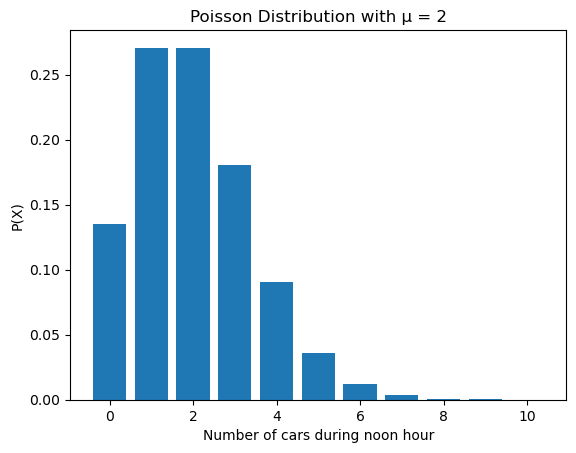

In [114]:
μ = 2
x = np.arange(0,11)
y = stats.poisson(μ).pmf(x)

plt.bar(x,y)
plt.title('Poisson Distribution with μ = 2')
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)')
plt.show()

#### - What is the probability that 3 or more cars come through the drive through?

In [4]:
# 3 or more cars. used sf(2) to get 3 or higher
stats.poisson(2).sf(2)

0.32332358381693654

#### - How likely is it that the drive through gets at least 1 car?

In [115]:
stats.poisson(2).sf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

#### - What grade point average is required to be in the top 5% of the graduating class?

In [6]:
mean = 3
std = .3

In [7]:
grades = stats.norm(mean,std)

In [9]:
#.05 or 5% is used to find the value since % is probability
grades.isf(.05)

3.4934560880854417

In [ ]:
# sigma sign == \sigma + tab
# μ = 3
# σ = 3
# grade = stats.norm(μ, σ)
# x = np.linespace(μ - 4*σ + 4*σ, 100)
# y= grade.pdf(x)

# plt.figure(figsize= )

#### - What GPA constitutes the bottom 15% of the class?

In [10]:
# ppf is less than or equal to, .15 == 15%
grades.ppf(.15)

2.689069983151863

#### - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [117]:
range_of_gpa = grades.ppf([.2, .3])

In [118]:
range_of_gpa

array([2.74751363, 2.84267985])

In [119]:
(range_of_gpa[0] < 2.8) and (range_of_gpa[1] > 2.8)

True

#### - If I have a GPA of 3.5, what percentile am I in?

In [12]:
grades.cdf(3.5)

0.9522096477271853

In [123]:
print(f"You are in the {round(grades.cdf(3.5), 2)* 100}th percentile")

You are in the 95.0th percentile


#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [13]:
stats.binom(4326, .02).sf(96)

0.13975823631416448

In [125]:
p = .02

Walkthrough using simulation

In [130]:
click = np.random.choice([0,1], (10_000, 4326), p = [.98, .02])
click

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

#### - What is the probability that at least one of your first 60 answers is correct?

In [131]:
n = 60 # first 60 questions
p = .01 # 1/100

stats_hw = stats.binom(n,p)


In [132]:
stats_hw.sf(0)

0.45284335760923855

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [ ]:
# clean or not clean == binomial
# 3% = 1 Student cleaning
# 22 * 3 = 66
# 90% of 66 = 59

In [104]:
stats.binom(59, .03).sf(0) 
# 59 is 90% of students visiting breakroom, .03 is 3% chance of each student cleaning
# sf(1) == 1 day. used sf since we had a given value

0.8342199288437352

In [135]:
n_students = round((22*3)*.9)
p=.03

In [136]:
clean = stats.binom(n_students, p)

In [137]:
clean.sf(0)

0.8342199288437352

What about 2 days?

In [111]:
# one_day = stats.binom(59, .03).sf(0) 

In [144]:
# stats.binom(59, .03).sf(2) # 2 days in a row

In [140]:
n2 = n_students * 2

In [141]:
notclean_2 = stats.binom(n2,p)

In [143]:
notclean_2.pmf(0)

0.027483031992576134

What about 1 week or 5 days

In [145]:
n5 = n_students * 5
notclean_5 = stats.binom(n5,p)

In [146]:
notclean_5.pmf(0)

0.00012521651388091245

295

In [150]:
stats.binom(295, .03).pmf(0) # 5 days or all week

0.00012521651388091245

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [25]:
pan_mean = 15
pan_std = 3
# 2 min to order
# 10 min food ready
# 1 hr lunch

In [156]:
stats.norm(pan_mean, pan_std).cdf(16)

0.6305586598182363

In [ ]:
# 15 people in line each taking 2 min to order == 30 min
# once its my turn to order it'll take 12 min from order to ready == 42 min
# 17 people is the cutoff for me to have at least 15 min remaining

In [151]:
μ = 15 * 2
σ = 3 * 2

total_lunch_time = 60 #min
eat_time = 15 #min
order_time = 2 # min
wait_time = 10 #min

max_wait = (total_lunch_time - eat_time) - order_time - wait_time
max_wait

33

In [154]:
stats.norm(μ,σ).cdf(max_wait)

0.6914624612740131

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

#### - What percent of employees earn less than 60,000?

In [65]:
(emp_cur_salary['salary'] < 60_000).sum()

64971

In [67]:
((emp_cur_salary['salary'] < 60_000).sum())/len(emp_cur_salary)

0.2705727041028802

In [84]:
stats.norm(avg_salary, std_salary).cdf(60_000)

0.24385690499062396

#### - What percent of employees earn more than 95,000?

In [158]:
stats.norm(avg_salary, std_salary).sf(95_000)

0.09208778318255045

#### - What percent of employees earn between 65,000 and 80,000?

In [101]:
1 - (stats.norm(avg_salary, std_salary).cdf(65_000) + stats.norm(avg_salary, std_salary).sf(80_000))

0.33506121323503213

In [159]:
np.diff(stats.norm(avg_salary, std_salary).cdf([65_000, 80_000]))

array([0.33506121])

#### - What do the top 5% of employees make?

In [98]:
stats.norm(avg_salary, std_salary).isf(.05)

100484.59048838491

#### Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

In [40]:
import pandas as pd

# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
# pd.read_sql('SELECT * FROM departments', url)


In [42]:
from env import username, password, get_db_url

In [43]:
url = get_db_url('employees')

In [49]:
avg_cur_salary = pd.read_sql('select round(avg(salary), 2) from salaries where to_date > now()', url)

In [78]:
avg_salary = avg_cur_salary['round(avg(salary), 2)'][0]

In [52]:
std_cur_salary = pd.read_sql('select round(std(salary), 2) from salaries where to_date > now()', url)

In [83]:
std_salary = std_cur_salary['round(std(salary), 2)'][0]

In [55]:
emp_cur_salary = pd.read_sql('select emp_no, salary from employees join salaries using(emp_no) where to_date > now()', url)

In [57]:
emp_cur_salary.head()

,emp_no,salary
0,10001,88958
1,10002,72527
2,10003,43311
3,10004,74057
4,10005,94692
